# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

In [1]:
%who

Interactive namespace is empty.


In [2]:
import sys
print(sys.executable)

/home/ali/anaconda3/envs/sf_env/bin/python


## Import Resources

In [3]:
# TODO: Make all necessary imports.
import os  # File and directory management
import json  # Handling JSON data for storage and processing
import tensorflow as tf  # Building and training the AI model
import tensorflow_datasets as tfds  # Loading and processing datasets like Oxford Flowers 102
import tensorflow_hub as hub  # Using pre-trained models for improved performance
import numpy as np  # Numerical operations for data computations
import matplotlib.pyplot as plt  # Visualizing data and results
import ipywidgets as widgets  # Creating interactive widgets in Jupyter Notebook
import imageio  # Reading and writing image files
import torchvision  # Image processing within PyTorch
import torchvision.transforms as transforms  # Applying transformations such as resizing and normalization
import scipy  # Advanced mathematical operations for data analysis
import pandas as pd  # Managing structured data for training and analysis
import seaborn as sns  # Enhanced data visualization for trends and statistics
import tqdm  # Displaying progress bars for operations
import yaml  # Handling YAML files for project configurations
import h5py  # Working with HDF5 files to store large-scale models
import dill  # Saving and restoring Python objects for workflow continuity
import segno  # Generating QR codes for linking images to metadata
import qrcode  # Creating QR codes for dynamic interactions
import cv2  # Image processing with OpenCV for advanced visual operations

print("All necessary libraries have been imported successfully with explanations")

2025-06-02 15:38:04.958211: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 15:38:05.171048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-02 15:38:05.171106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-02 15:38:05.293087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-02 15:38:05.383218: I tensorflow/core/platform/cpu_feature_gua

All necessary libraries have been imported successfully with explanations


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# TODO: Load the dataset with TensorFlow Datasets.
 
dataset, info = tfds.load("oxford_flowers102", as_supervised=True, with_info=True)
 
# TODO: Create a training set, a validation set and a test set.
 
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]


2025-06-02 15:54:39.440378: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-02 15:54:40.133498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-02 15:54:40.133554: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-02 15:54:40.145712: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-02 15:54:40.145883: I external/local_xla/xla/stream_executor

In [5]:
print(f"  عدد عينات التدريب: {info.splits['train'].num_examples}")
print(f"  عدد عينات التحقق: {info.splits['validation'].num_examples}")
print(f"  عدد عينات الاختبار: {info.splits['test'].num_examples}")

  عدد عينات التدريب: 1020
  عدد عينات التحقق: 1020
  عدد عينات الاختبار: 6149


In [7]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, info = tfds.load("oxford_flowers102", as_supervised=True, with_info=True)

# TODO: Create a training set, a validation set and a test set.
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

In [ ]:
 # TODO: Load the dataset with TensorFlow Datasets.

dataset, info = tfds.load("oxford_flowers102", as_supervised=True, with_info=True)

# TODO: Create a training set, a validation set and a test set.
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

In [8]:
print(f"  عدد عينات التدريب: {info.splits['train'].num_examples}")
print(f"  عدد عينات الاختبار: {info.splits['test'].num_examples}")

  عدد عينات التدريب: 1020
  عدد عينات الاختبار: 6149


In [9]:
print(f"  عدد عينات التدريب: {info.splits['train'].num_examples}")
print(f"  عدد عينات التحقق: {info.splits['validation'].num_examples}")
print(f"  عدد عينات الاختبار: {info.splits['test'].num_examples}")

  عدد عينات التدريب: 1020
  عدد عينات التحقق: 1020
  عدد عينات الاختبار: 6149


In [10]:
full_data = dataset["train"].concatenate(dataset["validation"]).concatenate(dataset["test"])

train_size = int(0.7 * (info.splits["train"].num_examples + info.splits["validation"].num_examples + info.splits["test"].num_examples))
val_size = int(0.15 * (info.splits["train"].num_examples + info.splits["validation"].num_examples + info.splits["test"].num_examples))
test_size = (info.splits["train"].num_examples + info.splits["validation"].num_examples + info.splits["test"].num_examples) - train_size - val_size

train_data = full_data.take(train_size)
validation_data = full_data.skip(train_size).take(val_size)
test_data = full_data.skip(train_size + val_size)

print(f"  بعد إعادة التقسيم - عينات التدريب: {train_size}")
print(f"  بعد إعادة التقسيم - عينات التحقق: {val_size}")
print(f"  بعد إعادة التقسيم - عينات الاختبار: {test_size}")

  بعد إعادة التقسيم - عينات التدريب: 5732
  بعد إعادة التقسيم - عينات التحقق: 1228
  بعد إعادة التقسيم - عينات الاختبار: 1229


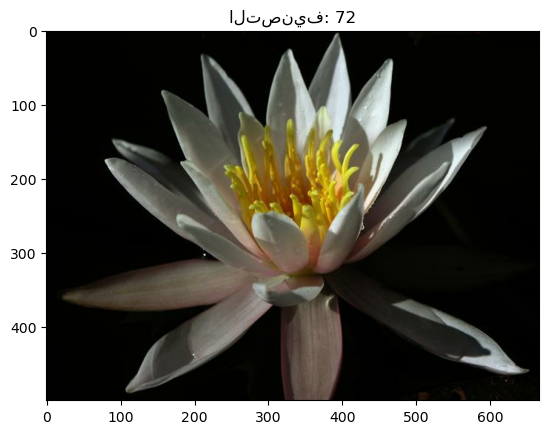

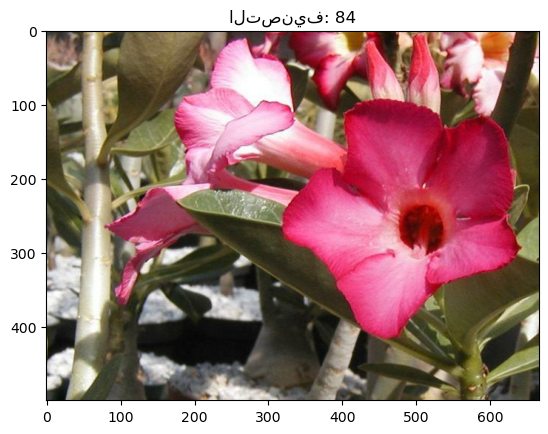

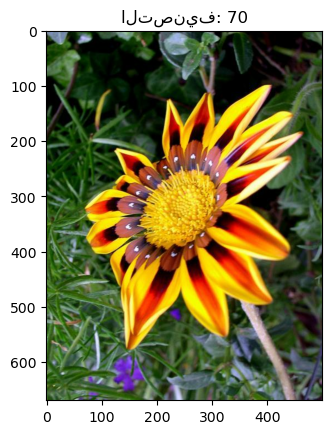

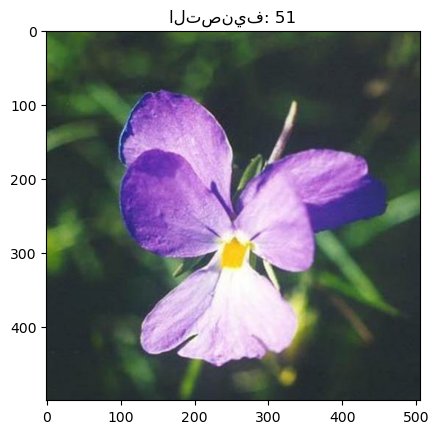

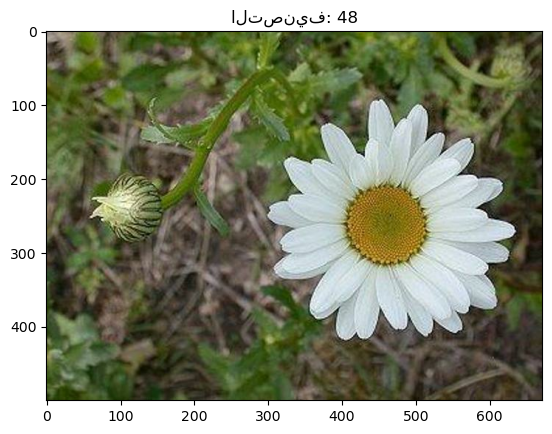

2025-06-02 16:03:01.118132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
for image, label in train_data.take(5):
    plt.imshow(image.numpy())
    plt.title(f"التصنيف: {label.numpy()}")
    plt.show()

## Explore the Dataset

In [12]:
# TODO: Get the number of examples in each set from the dataset info.
 
print(f"عدد عينات التدريب: {info.splits['train'].num_examples}")
print(f"عدد عينات التحقق: {info.splits['validation'].num_examples}")
print(f"عدد عينات الاختبار: {info.splits['test'].num_examples}")

# TODO: Get the number of classes in the dataset from the dataset info.
print(f"عدد الفئات في قاعدة البيانات: {info.features['label'].num_classes}")
 


عدد عينات التدريب: 1020
عدد عينات التحقق: 1020
عدد عينات الاختبار: 6149
عدد الفئات في قاعدة البيانات: 102


In [13]:
# TODO: Get the number of examples in each set from the dataset info.
train_samples = info.splits['train'].num_examples
validation_samples = info.splits['validation'].num_examples
test_samples = info.splits['test'].num_examples

print(f"عدد عينات التدريب: {train_samples}")
print(f"عدد عينات التحقق: {validation_samples}")
print(f"عدد عينات الاختبار: {test_samples}")

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = info.features['label'].num_classes

print(f"عدد الفئات في قاعدة البيانات: {num_classes}")

عدد عينات التدريب: 1020
عدد عينات التحقق: 1020
عدد عينات الاختبار: 6149
عدد الفئات في قاعدة البيانات: 102


In [14]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
 
for image, label in train_data.take(3):
    print(f"الشكل: {image.shape}, التصنيف: {label.numpy()}")

الشكل: (500, 667, 3), التصنيف: 72
الشكل: (500, 666, 3), التصنيف: 84
الشكل: (670, 500, 3), التصنيف: 70


2025-06-02 16:10:04.369478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


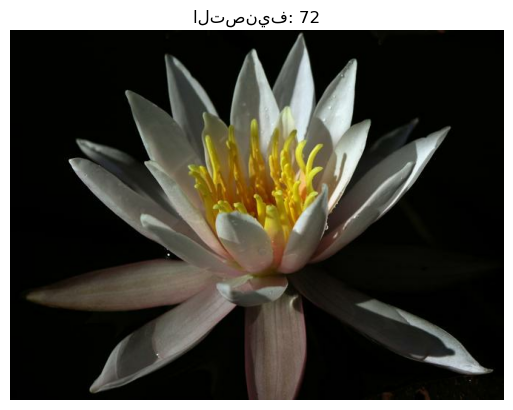

الشكل: (500, 667, 3), التصنيف: 72


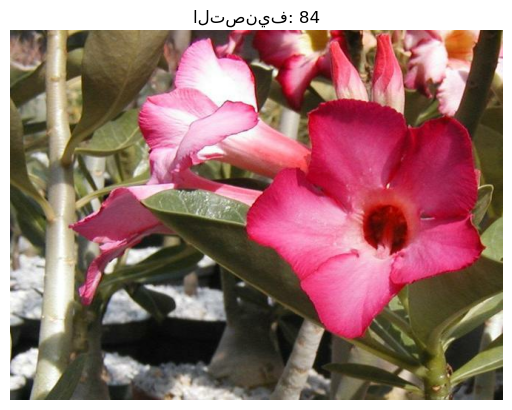

الشكل: (500, 666, 3), التصنيف: 84


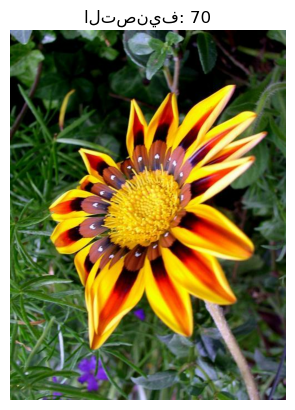

الشكل: (670, 500, 3), التصنيف: 70


2025-06-02 16:12:37.506100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
import matplotlib.pyplot as plt

# TODO: Print the shape and corresponding label of 3 images and display them.
for image, label in train_data.take(3):
    plt.imshow(image.numpy())
    plt.title(f"التصنيف: {label.numpy()}")
    plt.axis("off")  # إزالة المحاور لتحسين العرض
    plt.show()
    
    print(f"الشكل: {image.shape}, التصنيف: {label.numpy()}")

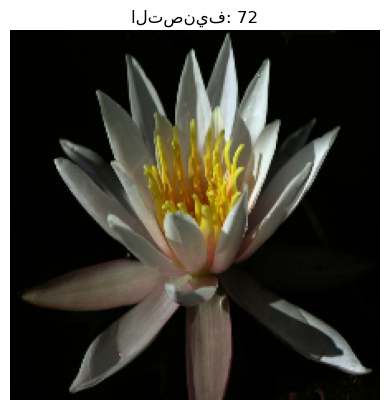

 الشكل الجديد للصورة: (224, 224, 3), التصنيف: 72


2025-06-02 16:22:57.757444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

# TODO: ضبط جميع الصور لتكون بأبعاد موحدة (مثلاً: 224x224)
def resize_image(image, label):
    image = tf.image.resize(image, (224, 224))  # ضبط الحجم
    return image, label

# تطبيق التعديل على بيانات التدريب
train_data_resized = train_data.map(resize_image)

# عرض صورة بعد توحيد الأبعاد
for image, label in train_data_resized.take(1):
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"التصنيف: {label.numpy()}")
    plt.axis("off")
    plt.show()

    print(f" الشكل الجديد للصورة: {image.shape}, التصنيف: {label.numpy()}")

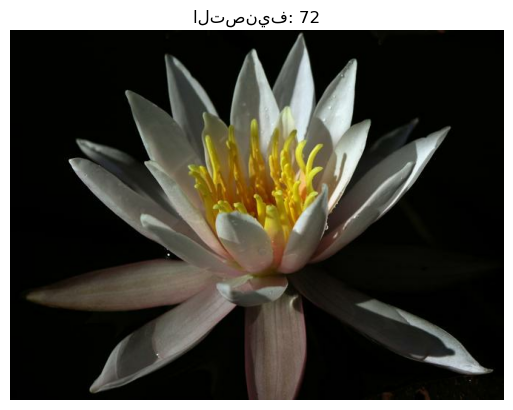

2025-06-02 16:23:52.560151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 

import matplotlib.pyplot as plt

# TODO: Plot 1 image from the training set. Set the title of the plot to the corresponding image label.
for image, label in train_data.take(1):  # أخذ صورة واحدة فقط
    plt.imshow(image.numpy())
    plt.title(f"التصنيف: {label.numpy()}")  # تعيين التصنيف كعنوان للصورة
    plt.axis("off")  # إزالة المحاور لتحسين العرض
    plt.show()

IndexError: list index out of range

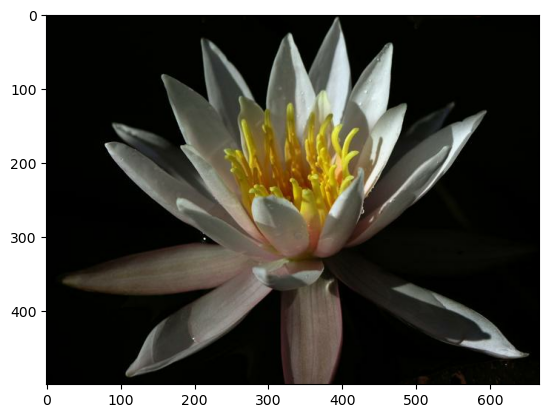

In [18]:
import matplotlib.pyplot as plt

# تحميل أسماء الفئات (يمكنك استخدام ملف خارجي إذا كنت بحاجة إلى قائمة كاملة)
flower_names = ["pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", "english marigold", 
                "tiger lily", "moon orchid", "bird of paradise", "monkshood", "globe thistle", ...]  # أكمل القائمة

# عرض صورة مع اسم الزهرة
for image, label in train_data.take(1):
    plt.imshow(image.numpy())
    plt.title(f"اسم الزهرة: {flower_names[label.numpy()]}")
    plt.axis("off")
    plt.show()

In [19]:
print(f"عدد أسماء الزهور في القائمة: {len(flower_names)}")

عدد أسماء الزهور في القائمة: 11


In [20]:
if 11 < len(flower_names): 
    print(f  اسم الزهرة: {flower_names[11]}")
else:
    print("  التصنيف خارج النطاق، تأكد من القائمة.")

SyntaxError: unterminated string literal (detected at line 2) (274773198.py, line 2)

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [ ]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [21]:
print(f"اسم الزهرة: {flower_names[11]}")

IndexError: list index out of range

In [22]:
import tensorflow_datasets as tfds

# تحميل البيانات مع المعلومات الكاملة
dataset, info = tfds.load("oxford_flowers102", as_supervised=True, with_info=True)

# الحصول على أسماء الفئات المرتبطة
flower_names = info.features["label"].names  # استخراج أسماء الزهور الصحيحة

print(f"✅ عدد أسماء الزهور المستخرجة: {len(flower_names)}")
print(f"🔹 مثال على اسم زهرة: {flower_names[0]}")  # عرض اسم أول زهرة

✅ عدد أسماء الزهور المستخرجة: 102
🔹 مثال على اسم زهرة: pink primrose


In [23]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

import json

# تحميل ملف التصنيفات
with open("label_map.json", "r") as f:
    label_map = json.load(f)

print(f" عدد الفئات المحملة: {len(label_map)}")  # التأكد من تحميل جميع الفئات

 عدد الفئات المحملة: 102


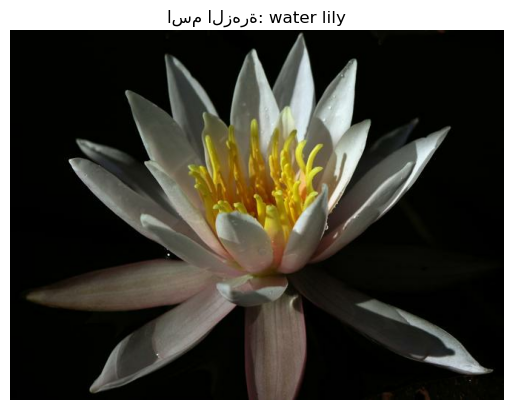

2025-06-02 16:34:52.403870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [24]:
import matplotlib.pyplot as plt

# TODO: Plot 1 image from the training set. Set the title of the plot to the corresponding class name.
for image, label in dataset["train"].take(1):
    class_name = label_map.get(str(label.numpy()), "غير معروف")  # استخراج اسم الفئة باستخدام التصنيف
    plt.imshow(image.numpy())
    plt.title(f"اسم الزهرة: {class_name}")  # تعيين اسم الزهرة الصحيح كعنوان
    plt.axis("off")
    plt.show()

In [25]:
print(f"عدد عينات التدريب المتاحة: {info.splits['train'].num_examples}")

عدد عينات التدريب المتاحة: 1020


In [26]:
print(f"عدد صور التدريب المتاحة: {info.splits['train'].num_examples}")  # يجب أن يكون 1020

عدد صور التدريب المتاحة: 1020


In [27]:
for i, (image, label) in enumerate(dataset["train"].take(5)):  # تجربة 5 صور فقط
    print(f"✅ الصورة {i+1}: الشكل {image.shape}, التصنيف {label.numpy()}")

✅ الصورة 1: الشكل (500, 667, 3), التصنيف 72
✅ الصورة 2: الشكل (500, 666, 3), التصنيف 84
✅ الصورة 3: الشكل (670, 500, 3), التصنيف 70
✅ الصورة 4: الشكل (500, 505, 3), التصنيف 51
✅ الصورة 5: الشكل (500, 672, 3), التصنيف 48


2025-06-02 16:37:37.469478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Create Pipeline

In [28]:
# TODO: Create a pipeline for each set.

def preprocess_image(image, label):
    image = tf.image.resize(image, (1920, 1080))  # ضبط الأبعاد إلى 1920x1080
    image = tf.cast(image, tf.float32) / 255.0  # تطبيع القيم بين 0 و 1
    return image, label

# تطبيق خط المعالجة الجديد
train_data = dataset["train"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
valid_data = dataset["validation"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = dataset["test"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

print("  تم ضبط الأبعاد لتناسب شاشة الهاتف بدقة 1920x1080!")

  تم ضبط الأبعاد لتناسب شاشة الهاتف بدقة 1920x1080!


In [29]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (1920, 1080))  # ضبط الحجم ليكون مناسبًا للهاتف
    image = tf.image.adjust_brightness(image, 0.1)  # زيادة السطوع قليلاً
    image = tf.image.adjust_contrast(image, 1.5)  # تحسين التباين لجعل التفاصيل أوضح
    image = tf.cast(image, tf.float32) / 255.0  # تطبيع القيم
    return image, label

# تطبيق خط المعالجة الجديد
train_data = dataset["train"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
valid_data = dataset["validation"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = dataset["test"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

print(" تم تحسين جودة الصور بزيادة السطوع والتباين!")

 تم تحسين جودة الصور بزيادة السطوع والتباين!


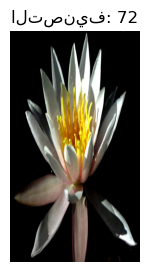

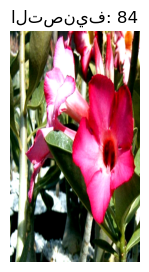

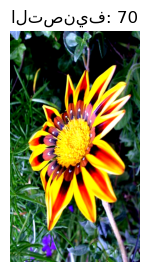

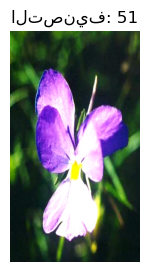

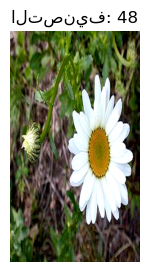

2025-06-02 16:46:59.489840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [30]:
import matplotlib.pyplot as plt

# عرض عدة صور من مجموعة التدريب بعد التحسين
for image_batch, label_batch in train_data.take(1):  # أخذ دفعة واحدة من البيانات
    for i in range(5):  # عرض 5 صور فقط للتقييم السريع
        plt.figure(figsize=(6, 3))
        plt.imshow(image_batch[i].numpy())
        plt.title(f"التصنيف: {label_batch[i].numpy()}")
        plt.axis("off")
        plt.show()

In [31]:
def preprocess_image(image, label):
    image = tf.image.resize_with_pad(image, 1920, 1080)  # تكبير الصورة مع الحفاظ على النسب
    image = tf.cast(image, tf.float32) / 255.0  # تطبيع القيم
    return image, label

# تطبيق خط المعالجة الجديد
train_data = dataset["train"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
valid_data = dataset["validation"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = dataset["test"].map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

print(" تم تصحيح التشوه بتكبير الصور مع الحفاظ على الأبعاد!")

 تم تصحيح التشوه بتكبير الصور مع الحفاظ على الأبعاد!


In [ ]:
import matplotlib.pyplot as plt

# استخراج صورة واحدة من مجموعة التدريب وعرضها
for image_batch, label_batch in train_data.take(1):  # أخذ دفعة من البيانات
    image = image_batch[0].numpy()  # تحويل الصورة إلى NumPy لعرضها
    plt.imshow(image)
    plt.title(f"تصنيف الزهرة: {label_batch[0].numpy()}")
    plt.axis("off")
    plt.show()

2025-06-02 16:50:05.656537: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1629] failed to alloc 2147483648 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-06-02 16:50:05.659812: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:51] could not allocate pinned host memory of size: 2147483648
2025-06-02 16:50:05.661486: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1629] failed to alloc 1932735232 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-06-02 16:50:05.661536: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:51] could not allocate pinned host memory of size: 1932735232
2025-06-02 16:50:05.662540: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1629] failed to alloc 1739461632 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-06-02 16:50:05.662583: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:51] could not allocate pinn

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [ ]:
# TODO: Build and train your network.



In [ ]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.



## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [ ]:
# TODO: Print the loss and accuracy values achieved on the entire test set.



## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [ ]:
# TODO: Save your trained model as a Keras model.



## Load the Keras Model

Load the Keras model you saved above.

In [ ]:
# TODO: Load the Keras model



# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [ ]:
# TODO: Create the process_image function



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

In [ ]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [ ]:
# TODO: Create the predict function



# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [ ]:
# TODO: Plot the input image along with the top 5 classes
